# Project Description
In this project I will build a neural network to classify songs by genre.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf 
import tensorflow_io as tfio
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES']= '0'

# Load Data and organize data

In [3]:
song_features = pd.read_csv(r'D:\Program Files\data\GTZAN_Dataset\features_30_sec.csv')
song_features

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [4]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=0.1)
    return wav

In [5]:
data = song_features.iloc[0:, 1:]
X = data.loc[:, data.columns != 'label']
tsne = TSNE(n_components=2, verbose=1, random_state=123, learning_rate=200, init='random')
z = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 65620.811080
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.399330
[t-SNE] KL divergence after 1000 iterations: 0.360964


In [6]:
df = pd.DataFrame()
# get our first component
df["comp_one"] = z[:,0]
# get our second component
df["comp_two"] = z[:,1]
# add our reduced data into our dataframe
song_features = pd.concat([song_features, df], axis=1)

In [7]:
song_features

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,comp_one,comp_two
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues,24.197666,24.467010
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues,-42.429550,-17.942120
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues,32.142105,22.737471
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues,3.725972,-3.545660
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues,-1.799847,-8.185034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock,7.302795,11.005249
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock,13.548779,20.556534
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock,30.491373,18.857143
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock,3.113676,7.667728


In [8]:
list(set(song_features.label))

['rock',
 'metal',
 'blues',
 'hiphop',
 'classical',
 'jazz',
 'disco',
 'reggae',
 'pop',
 'country']

In [9]:
# disco = song_features.loc[song_features.label == 'disco']
# reggae = song_features.loc[song_features.label == 'raggae']
# country = song_features.loc[song_features.label == 'country']
# jazz = song_features.loc[song_features.label == 'jazz']
# pop = song_features.loc[song_features.label == 'pop']
# metal = song_features.loc[song_features.label == 'metal']
# classical = song_features.loc[song_features.label == 'classical']
# hiphop = song_features.loc[song_features.label == 'hiphop']
# rock = song_features.loc[song_features.label == 'rock']
# blues = song_features.loc[song_features.label == 'blues']

# Visualize Data 
plot wav, plot spectogram, use tsne to graph

Text(0, 0.5, 'Principal Component 2')

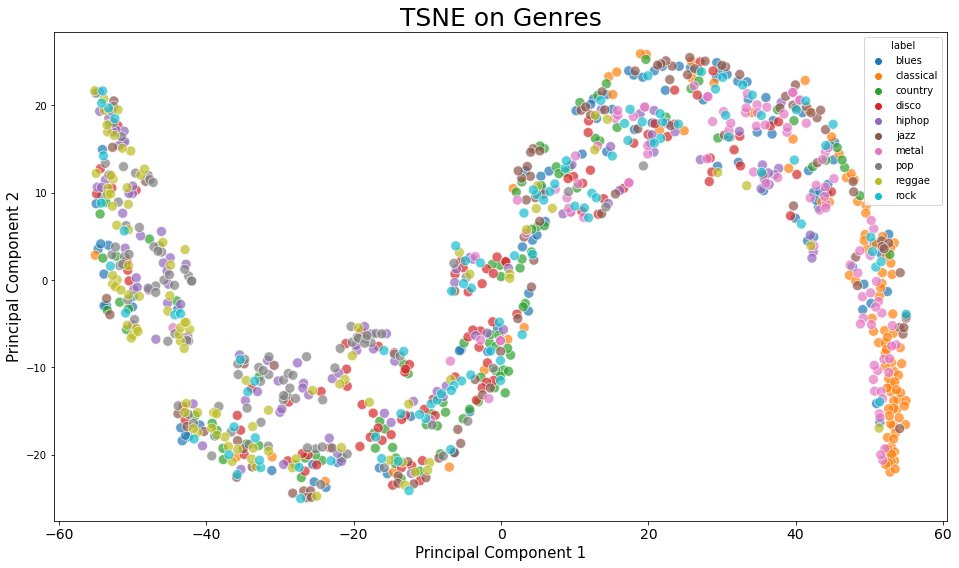

In [10]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "comp_one", y = "comp_two", data = song_features, hue = "label", alpha = 0.7,
               s = 100);

plt.title('TSNE on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

# Create neural Network 

In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf 
import tensorflow_io as tfio
import matplotlib.pyplot as plt

In [12]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES']= '0'

In [13]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [14]:
bb = load_wav_16k_mono('./audio_data/metal_wav/back in black.wav')
accept = load_wav_16k_mono('./audio_data/classical_wav/acceptance.wav')

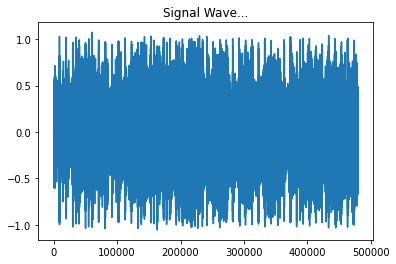

In [15]:
plt.title("Signal Wave...")
plt.plot(bb)
plt.show()

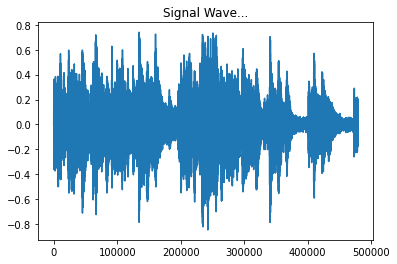

In [16]:
plt.title("Signal Wave...")
plt.plot(accept)
plt.show()

In [17]:
def preprocess(file_path): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [18]:
bb_spectrum = preprocess('./audio_data/metal_wav/back in black.wav')
accept_spectrogram = preprocess('./audio_data/classical_wav/acceptance.wav')

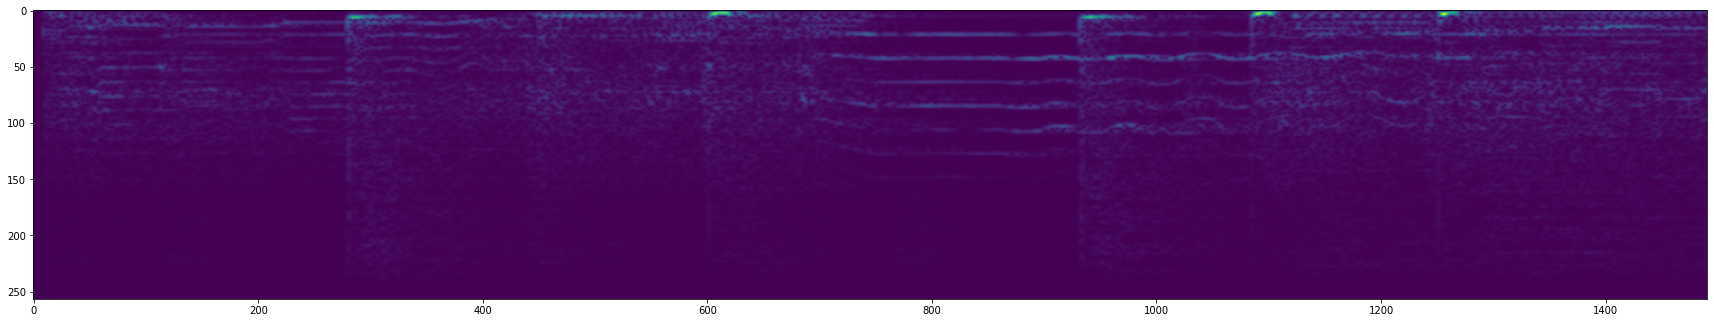

In [19]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(bb_spectrum)[0])
plt.show()

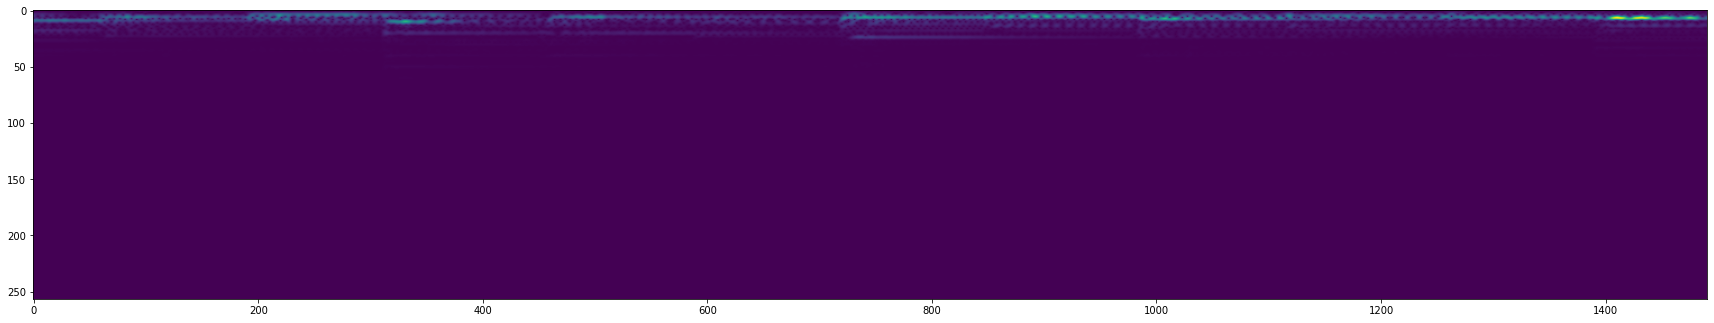

In [20]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(accept_spectrogram)[0])
plt.show()

In [21]:
test = pd.read_csv(r'D:\Program Files\data\GTZAN_Dataset\test.csv')

In [22]:
train = pd.read_csv(r'D:\Program Files\data\GTZAN_Dataset\train.csv')

In [23]:
test

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,NaN,0.0289,0.625,122.019,202960.000000,4
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,NaN,0.1620,0.222,74.028,4.093117,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,Dudu Aharon,◊ë◊ó◊ï◊® ◊®◊í◊ô◊©,28.0,0.816,0.927,7.0,-1.581,1,0.0600,0.26400,NaN,0.0735,0.643,128.019,231680.000000,4
7709,Elephant Tree,Echoes,45.0,0.429,0.599,7.0,-7.236,0,0.0363,0.02540,0.009330,0.3620,0.257,127.446,367879.000000,4
7710,Shankar Mahadevan,Man Mohini,38.0,0.805,0.905,6.0,-7.222,0,0.2750,0.15900,0.000011,0.0590,0.691,135.224,2.453550,4
7711,Talking Heads,Life During Wartime - 2005 Remaster,51.0,0.801,0.930,9.0,-7.365,1,0.0354,0.08060,0.152000,0.0558,0.967,133.255,221320.000000,4


In [24]:
train

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [25]:
blues_song =load_wav_16k_mono(r'D:\Program Files\data\GTZAN_Dataset\genres_original\blues\blues.00000.wav')

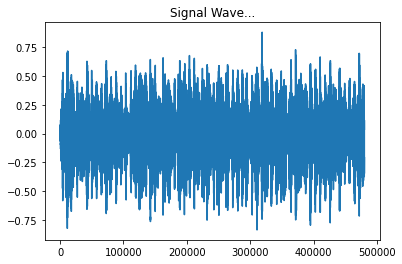

In [26]:
plt.title("Signal Wave...")
plt.plot(blues_song)
plt.show()

In [27]:
blues_song = preprocess(r'D:\Program Files\data\GTZAN_Dataset\genres_original\blues\blues.00000.wav')

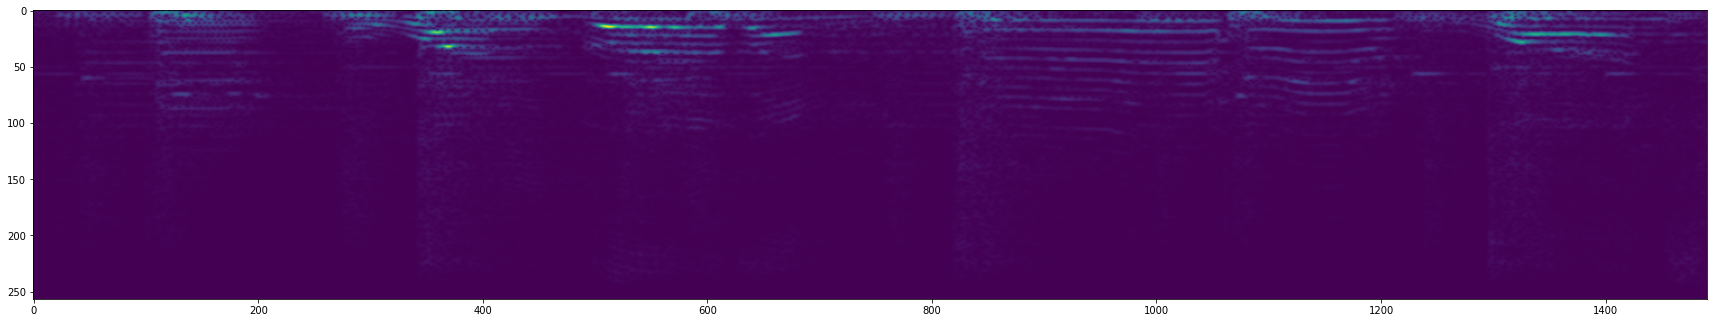

In [28]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(blues_song)[0])
plt.show()

In [29]:
blues_song_img = preprocess(r'D:\Program Files\data\GTZAN_Dataset\genres_original\blues\blues.00000.wav')